# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [59]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [115]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]
print(type(A))

<class 'numpy.ndarray'>


## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

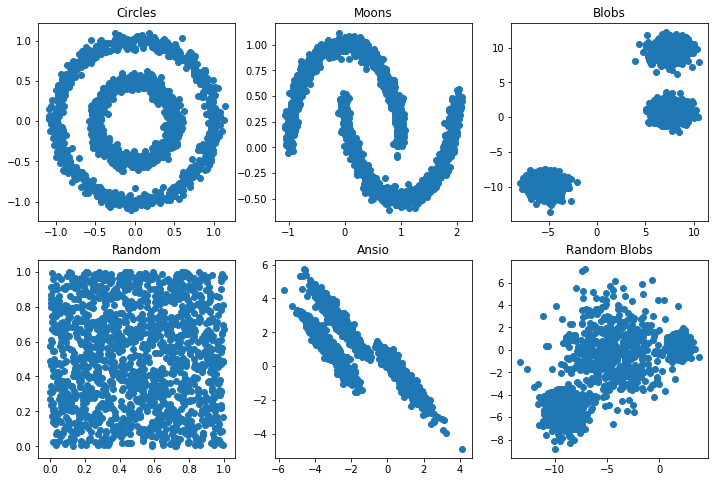

In [116]:
def plotFigures(A,B,C,D,E,F):
    fig=plt.figure(figsize=(12, 8))
    ax1=fig.add_subplot(2, 3, 1)
    ax1.title.set_text('Circles')
    plt.scatter(x = A[:,0], y = A[:,1])
    ax2=fig.add_subplot(2, 3, 2)
    ax2.title.set_text('Moons')
    plt.scatter(x = B[:,0], y = B[:,1])
    ax3=fig.add_subplot(2, 3, 3)
    ax3.title.set_text('Blobs')
    plt.scatter(x = C[:,0], y = C[:,1])
    ax4=fig.add_subplot(2, 3, 4)
    ax4.title.set_text('Random')
    plt.scatter(x = D[:,0], y = D[:,1])
    ax5=fig.add_subplot(2, 3, 5)
    ax5.title.set_text('Ansio')
    plt.scatter(x = E[:,0], y = E[:,1])
    ax6=fig.add_subplot(2, 3, 6)
    ax6.title.set_text('Random Blobs')
    plt.scatter(x = F[:,0], y = F[:,1])
plotFigures(A,B,C,D,E,F)

In [117]:
# 
from sklearn.cluster import KMeans

In [118]:
ncluster = 2
#myKMeans = cluster.k_means(n_clusters = ncluster, n_jobs = -1).fit(A)
myKMeans = KMeans(n_clusters = ncluster, n_jobs = -1).fit_predict(A)

In [148]:
#ncluster = 2
#fig=plt.figure(figsize=(12, 8))
#titels = ['Circles','Moons','Blobs','Random','Ansio','Random Blobs']
#data = ['A','B','C','D','E','F']
#for i in range(6):
#    ax = fig.add_subplot(2,3,i+1)
#    ax.title.set_text(titels[i])
#    myKMeans = KMeans(n_clusters = ncluster, n_jobs = -1).fit_predict(eval(data[i]))
#    plt.scatter(x = eval(data[i])[:,0], y = eval(data[i])[:,1],c = myKMeans)

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

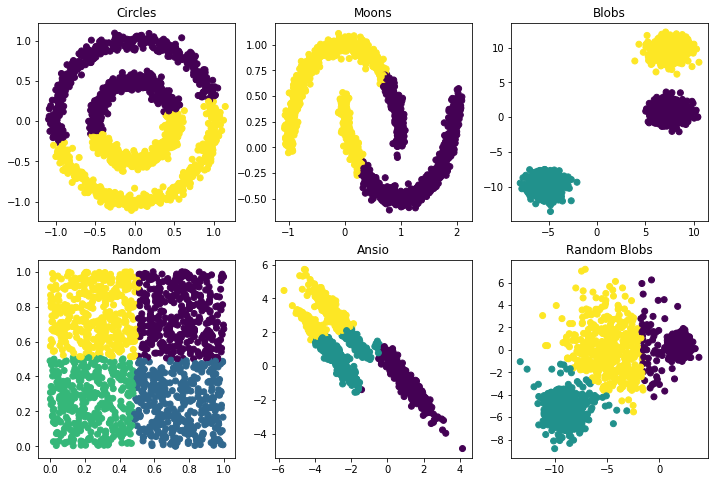

In [151]:
n = 3
#AA = cluster.k_means(A,n_clusters = n, n_jobs = -1)
#BB = cluster.k_means(B,n_clusters = n, n_jobs = -1)
#CC = cluster.k_means(C,n_clusters = n, n_jobs = -1)
#DD = cluster.k_means(D,n_clusters = n, n_jobs = -1)
#EE = cluster.k_means(E,n_clusters = n, n_jobs = -1)
#FF = cluster.k_means(F,n_clusters = n, n_jobs = -1)
ncluster = 3
fig=plt.figure(figsize=(12, 8))
titels = ['Circles','Moons','Blobs','Random','Ansio','Random Blobs']
data = ['A','B','C','D','E','F']
ncluster = [2,2,3,4,3,3]
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    ax.title.set_text(titels[i])
    myKMeans = KMeans(n_clusters = ncluster[i], n_jobs = -1).fit_predict(eval(data[i]))
    plt.scatter(x = eval(data[i])[:,0], y = eval(data[i])[:,1],c = myKMeans)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

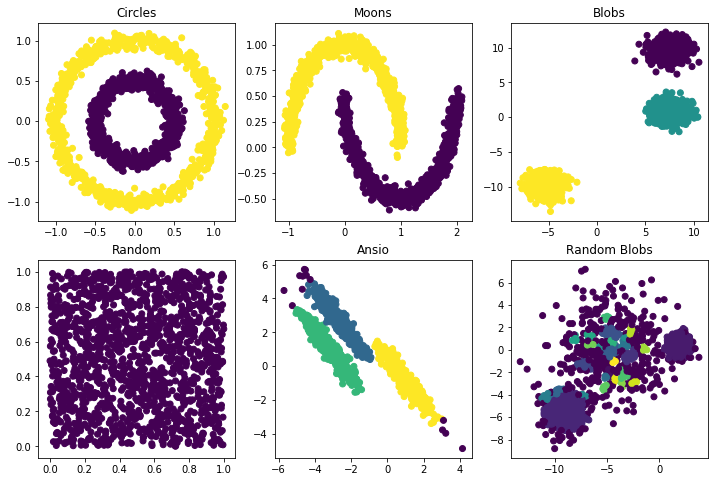

In [147]:
fig=plt.figure(figsize=(12, 8))
titels = ['Circles','Moons','Blobs','Random','Ansio','Random Blobs']
data = ['A','B','C','D','E','F']
eps = [0.2, 0.2, 2, 1, 0.35, 0.3]
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    ax.title.set_text(titels[i])
    myKMeans = cluster.DBSCAN(eps = eps[i]).fit_predict(eval(data[i]))
    plt.scatter(x = eval(data[i])[:,0], y = eval(data[i])[:,1],c = myKMeans)